<a href="https://colab.research.google.com/github/Culprit0897/Culprit0897/blob/main/Traceability_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load the data
file_path = "/content/drive/MyDrive/Colab Notebooks/TRACEABILITY_REPORT__2025_04_03_17_12_35.xlsx"
df = pd.read_excel(file_path)
print('df',df)

Mounted at /content/drive
df       S.No        Date      Time  Shift Process Production Unit  \
0        1  2025-04-03  17:12:20      2  CURING        CU_E02_1   
1        2  2025-04-03  17:12:06      2  CURING        CU_E06_2   
2        3  2025-04-03  17:11:47      2  CURING        CU_E06_1   
3        4  2025-04-03  17:11:47      2  CURING          CU_J12   
4        5  2025-04-03  17:10:46      2  CURING          CU_B04   
...    ...         ...       ...    ...     ...             ...   
2538  2539  2025-04-02  06:48:36      1  CURING        CU_G04_1   
2539  2540  2025-04-02  06:48:28      1  CURING        CU_G04_2   
2540  2541  2025-04-02  06:48:07      1  CURING          CU_B02   
2541  2542  2025-04-02  06:47:04      1  CURING        CU_C06_2   
2542  2543  2025-04-02  06:46:51      1  CURING        CU_C06_1   

                QR code Number Vulcanized Barcode               SKU QR Code  \
0           B2504031TB_T036727         V000233040        B2504031TB_T036727   
1       

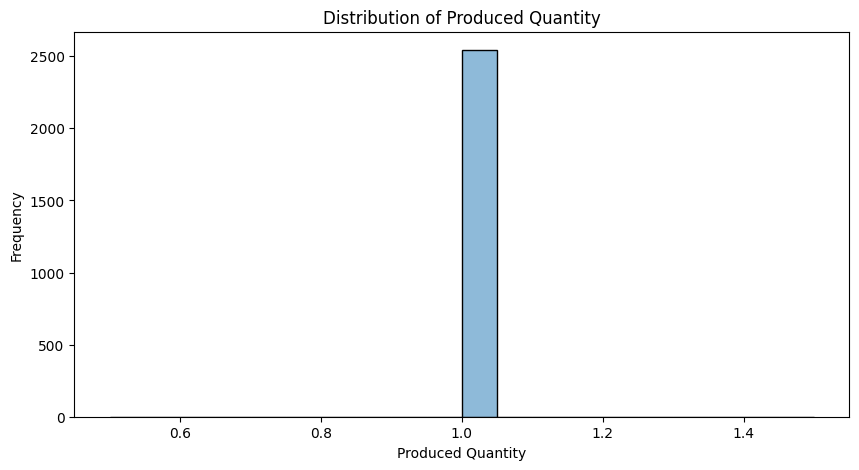

In [4]:
# Convert Date and Time columns to datetime
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time

# Visualization: Distribution of Produced Quantity
plt.figure(figsize=(10, 5))
sns.histplot(df['Produced Quantity'], bins=20, kde=True)
plt.title('Distribution of Produced Quantity')
plt.xlabel('Produced Quantity')
plt.ylabel('Frequency')
plt.show()

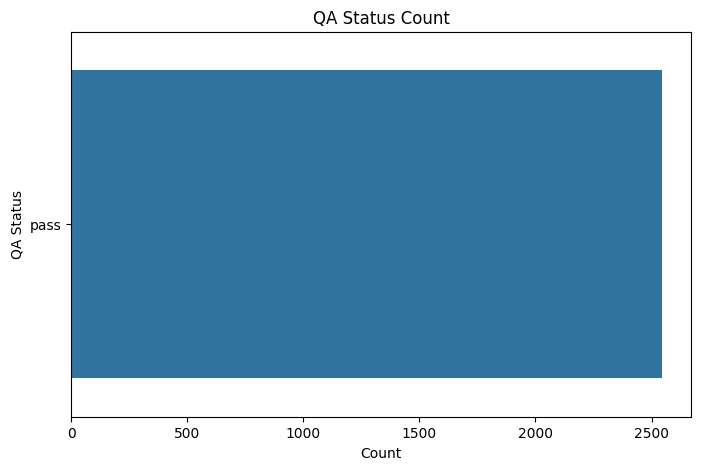

In [5]:
# Visualization: QA Status Count
plt.figure(figsize=(8, 5))
sns.countplot(y=df['QA Status'], order=df['QA Status'].value_counts().index)
plt.title('QA Status Count')
plt.xlabel('Count')
plt.ylabel('QA Status')
plt.show()

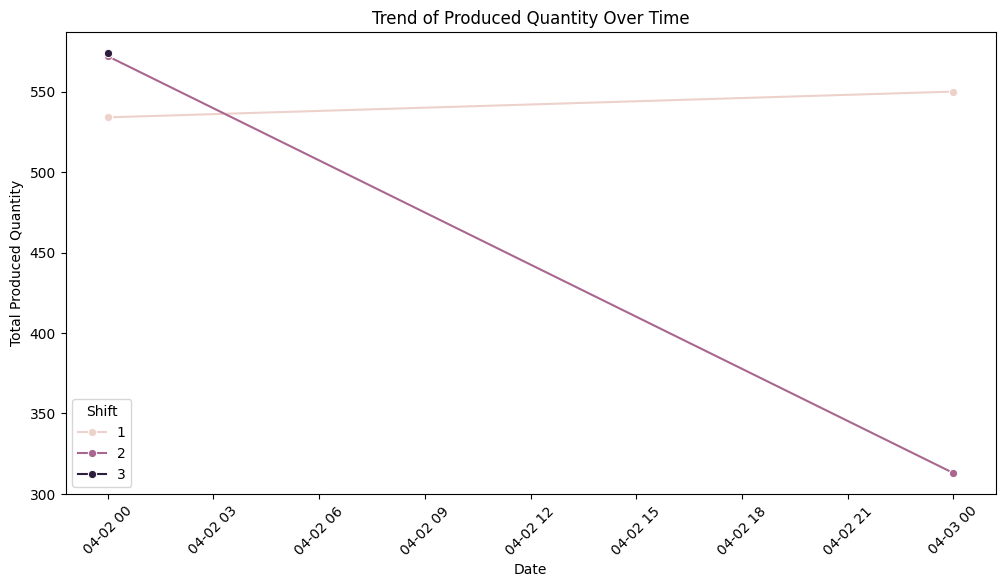

In [6]:
# Visualization: Trend of Production Over Time
plt.figure(figsize=(12, 6))
df_grouped = df.groupby(['Date', 'Shift'])['Produced Quantity'].sum().reset_index()
sns.lineplot(data=df_grouped, x='Date', y='Produced Quantity', hue='Shift', marker='o')
plt.title('Trend of Produced Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Total Produced Quantity')
plt.xticks(rotation=45)
plt.legend(title='Shift')
plt.show()